# 自然言語のベクトル化

自然言語処理（NLP, Natural Language Processing） とは人間が普段使っている 自然言語 をコンピュータに処理させる技術のことです。ここではその中でも、機械学習の入力として自然言語を用いることを考えていきます。


多くの機械学習手法は 数値データ（量的変数） の入力を前提にしていますので、自然言語の テキストデータ を数値データに変換する必要があります。これを 自然言語のベクトル化 と呼びます。ベクトル化の際にテキストデータの特徴をうまく捉えられるよう、様々な手法が考えられてきていますので、このSprintではそれらを学びます。



In [0]:
pwd

'/content'

In [0]:
# IMDBをカレントフォルダにダウンロード
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# 解凍
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsupはラベル無しのため削除
!rm -rf aclImdb/train/unsup
# IMDBデータセットの説明を表示
!cat aclImdb/README

--2020-03-27 01:32:22--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  22.3MB/s    in 3.6s    

2020-03-27 01:32:26 (22.3 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an a

In [0]:
from sklearn.datasets import load_files
train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [0]:
print("x : {}".format(x_train[0]))


x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [0]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


## n-gram
上のBoWの例では1つの単語（トークン）毎の登場回数を数えましたが、これでは語順は全く考慮されていません。


考慮するために、隣あう単語同士をまとめて扱う **n-gram** という考え方を適用することがあります。2つの単語をまとめる場合は **2-gram (bigram)** と呼び、次のようになります。

In [0]:
# ngram_rangeで利用するn-gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


## 【問題1】BoWのスクラッチ実装
以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください。
<br /><br />
*This movie is SOOOO funny!!!*

*What a movie! I never*

*best movie ever!!!!! this movie*

In [0]:
sentences = ['This movie is SOOOO funny!!!',
 'What a movie! I never',
 'best movie ever!!!!! this movie']

In [0]:
for i in sentences:
  print(i)

This movie is SOOOO funny!!!
What a movie! I never
best movie ever!!!!! this movie


In [0]:
import numpy as np

def BoW_1g_scratch(x):
  word = ''
  s = []
  for sentence in x:
    word += sentence.replace('!', '').lower() + ' '
    s.append(sentence.lower())
  # print('word:', word)
  x = s
  columns= list(sorted(set(word.replace('!', '').split()), key=word.index))
  array = np.zeros((len(x), len(columns)))
  # print(x[0].split().count('This'))
  # print(columns)
  for i in range(len(x)):
    for j in range(len(columns)):
      array[i, j] = x[i].split().count(columns[j])
  df = pd.DataFrame(array, columns=columns)
  return df

In [0]:
BoW_1g_scratch(sentences)

,this,is,i,movie,soooo,funny,what,a,never,ever,best
0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [0]:
sentences

['This movie is SOOOO funny!!!',
 'What a movie! I never',
 'best movie ever!!!!! this movie']

In [0]:
  def BoW_2g_scratch(x):
    word = ''
    s = []
    for sentence in x:
      word += sentence.replace('!', '').lower() + ' '
      s.append(sentence.lower())
    print('word:', word)
    x = s
    columns= list(sorted(set(word.replace('!', '').split()), key=word.index))
    array = np.empty((len(x), len(columns)))
    # print(x[0].split().count('This'))
    for i in range(len(columns)-1):
      columns[i] = columns[i] + ' ' + columns[i+1]
    print(columns)
    for i in range(len(x)):
      for j in range(len(columns)):
        array[i, j] = x[i].split().count(columns[j])
    df = pd.DataFrame(array, columns=columns)
    return df

In [0]:
sentences

['This movie is SOOOO funny!!!',
 'What a movie! I never',
 'best movie ever!!!!! this movie']

In [0]:
  def BoW_2g_scratch(x):
    s_list = []
    for sentence in x:
      s = sentence.replace('!', '').lower() + ' '
      s = s.split()
      s_list.append(s)
    # print(s_list)

    for s in range(len(s_list)):
      for w in range(len(s_list[s])-1):
        s_list[s][w] = s_list[s][w] + ' ' + s_list[s][w+1]
    # print(s_list)

    columns = []
    for s in range(len(s_list)):
      for w in range(len(s_list[s])):
        columns.append(s_list[s][w])

    print(columns)
    x = s_list
    # columns= list(word.replace('!', '').split())
    array = np.empty((len(x), len(columns)))

    for i in range(len(x)):
      for j in range(len(columns)):
        array[i, j] = x[i].count(columns[j])
    df = pd.DataFrame(array, columns=columns)
    return df

In [0]:
BoW_2g_scratch(sentences)

['this movie', 'movie is', 'is soooo', 'soooo funny', 'funny', 'what a', 'a movie', 'movie i', 'i never', 'never', 'best movie', 'movie ever', 'ever this', 'this movie', 'movie']


,this movie,movie is,is soooo,soooo funny,funny,what a,a movie,movie i,i never,never,best movie,movie ever,ever this,this movie,movie
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [0]:
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=stop_words, max_features = 5, token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(x_train)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all'

,br,film,like,movie,one
0,4,2,0,1,0
1,0,0,0,4,2
2,0,0,0,3,0
3,8,2,1,2,0
4,0,3,1,5,1
...,...,...,...,...,...
24995,8,3,2,3,2
24996,0,2,1,1,2
24997,0,0,0,2,3
24998,4,0,1,1,1


## 【問題2】TF-IDFの計算
IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features = 20, token_pattern=r'(?u)\b\w+\b')
X = vectorizer.fit_transform(x_train)
# print(vectorizer.get_feature_names())
bow = X.toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)


,also,bad,br,even,film,first,get,good,great,like,movie,much,one,people,really,see,story,time,well,would
0,0.000000,0.000000,0.746653,0.254227,0.385635,0.000000,0.000000,0.000000,0.0,0.000000,0.181424,0.000000,0.000000,0.000000,0.000000,0.258974,0.000000,0.249756,0.000000,0.258464
1,0.172984,0.538763,0.000000,0.307013,0.000000,0.173395,0.169474,0.143545,0.0,0.000000,0.438187,0.332309,0.230530,0.000000,0.321536,0.156373,0.000000,0.150807,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.337371,0.000000,0.000000,0.372464,0.315477,0.0,0.000000,0.722274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355311,0.000000
3,0.000000,0.000000,0.898881,0.000000,0.232129,0.000000,0.000000,0.143099,0.0,0.129060,0.218413,0.000000,0.000000,0.175186,0.000000,0.000000,0.000000,0.150338,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.377123,0.374437,0.182984,0.000000,0.0,0.139783,0.591400,0.179400,0.124454,0.000000,0.000000,0.168839,0.000000,0.488487,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.129105,0.000000,0.672958,0.000000,0.260679,0.000000,0.126484,0.000000,0.0,0.193245,0.245276,0.000000,0.172053,0.000000,0.119987,0.233413,0.120037,0.337657,0.000000,0.349430
24996,0.424511,0.000000,0.000000,0.000000,0.571429,0.000000,0.000000,0.000000,0.0,0.317706,0.268832,0.000000,0.565731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.232060,0.0,0.000000,0.354196,0.000000,0.559027,0.000000,0.000000,0.000000,0.520026,0.487601,0.000000,0.000000
24998,0.000000,0.000000,0.679480,0.000000,0.000000,0.522661,0.000000,0.000000,0.0,0.195117,0.165102,0.000000,0.173720,0.000000,0.000000,0.235675,0.242401,0.000000,0.000000,0.235211


## 【問題3】TF-IDFを用いた学習
問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。モデルは2値分類が行える任意のものを利用してください。


ここでは精度の高さは求めませんが、最大の語彙数やストップワード、n-gramの数を変化させて影響を検証してみてください。

In [0]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features = 20, ngram_range=(1, 1), token_pattern=r'(?u)\b\w+\b')
X_train = vectorizer.fit_transform(x_train)
X_train = X_train.toarray()
X_test = vectorizer.fit_transform(x_test)
X_test = X_test.toarray()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.65768

In [0]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features = 30, ngram_range=(1, 1), token_pattern=r'(?u)\b\w+\b')
X_train = vectorizer.fit_transform(x_train)
X_train = X_train.toarray()
X_test = vectorizer.fit_transform(x_test)
X_test = X_test.toarray()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.61368

In [0]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features = 30, ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
X_train = vectorizer.fit_transform(x_train)
X_train = X_train.toarray()
X_test = vectorizer.fit_transform(x_test)
X_test = X_test.toarray()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.57984

## 【問題4】TF-IDFのスクラッチ実装
以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。

In [0]:
def TFIDF_scratch(x):
  word = ''
  s = []
  for sentence in x:
    word += sentence.replace('!', '').lower() + ' '
    s.append(sentence.lower())
  # print('word:', word)
  x = s
  columns= list(sorted(set(word.replace('!', '').split()), key=word.index))
  array = np.zeros((len(x), len(columns)))
  # print(x[0].split().count('This'))
  # print(columns)
  for i in range(len(x)):
    for j in range(len(columns)):
      array[i, j] = x[i].split().count(columns[j])
  array = array/np.sum(array, axis=0)*np.log(len(x)/np.sum(array, axis=0))
  #array = np.log(len(x)/array)

  df = pd.DataFrame(array, columns=columns)
  return df

In [0]:
TFIDF_scratch(sentences)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


,this,is,i,movie,soooo,funny,what,a,never,ever,best
0,0.202733,1.098612,0.000000,0.0,1.098612,NaN,0.000000,0.000000,0.000000,NaN,0.000000
1,0.000000,0.000000,1.098612,0.0,0.000000,NaN,1.098612,1.098612,1.098612,NaN,0.000000
2,0.202733,0.000000,0.000000,0.0,0.000000,NaN,0.000000,0.000000,0.000000,NaN,1.098612


In [0]:
def TFIDF_sklearn_scratch(x):
  word = ''
  s = []
  for sentence in x:
    word += sentence.replace('!', '').lower() + ' '
    s.append(sentence.lower())
  # print('word:', word)
  x = s
  columns= list(sorted(set(word.replace('!', '').split()), key=word.index))
  array = np.zeros((len(x), len(columns)))
  # print(x[0].split().count('This'))
  # print(columns)
  for i in range(len(x)):
    for j in range(len(columns)):
      array[i, j] = x[i].split().count(columns[j])
  array = array * np.log(1 + len(x)/1 + np.sum(array, axis=0)) + 1
  #array = np.log(len(x)/array)

  df = pd.DataFrame(array, columns=columns)
  return df

In [0]:
TFIDF_sklearn_scratch(sentences)

,this,is,i,movie,soooo,funny,what,a,never,ever,best
0,2.791759,2.609438,1.000000,2.94591,2.609438,1.0,1.000000,1.000000,1.000000,1.0,1.000000
1,1.000000,1.000000,2.609438,1.00000,1.000000,1.0,2.609438,2.609438,2.609438,1.0,1.000000
2,2.791759,1.000000,1.000000,4.89182,1.000000,1.0,1.000000,1.000000,1.000000,1.0,2.609438


In [0]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習
print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
  print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[-0.00432061  0.00146342 -0.03311792 -0.03904233  0.03732451 -0.04992527
  0.02734522 -0.03816913  0.0401972  -0.0345713 ]
movieのベクトル : 
[-0.01798015 -0.0188274  -0.00479448  0.01656251  0.01614994 -0.01908701
 -0.01009056 -0.0461502   0.00622939 -0.01964515]
isのベクトル : 
[ 0.00593525 -0.02370409 -0.04295177 -0.04700369 -0.00799415 -0.03957272
 -0.0203962  -0.00839078 -0.04218608 -0.03880072]
veryのベクトル : 
[ 0.02554665 -0.02248098  0.03125134  0.0328373   0.00213881 -0.04529309
  0.04849834  0.03995639  0.0005041   0.00099339]
goodのベクトル : 
[-0.03640822  0.04240274 -0.02286788  0.03799818  0.0141962  -0.01471254
  0.00068117  0.00923571 -0.00676886 -0.0321453 ]
filmのベクトル : 
[-0.04789886 -0.00703039 -0.00933911  0.00307544 -0.03892777 -0.01032932
 -0.04820976 -0.01435253  0.01311033  0.04308848]
aのベクトル : 
[ 0.01174868  0.01613882 -0.00124863 -0.04566534  0.03849325 -0.01305924
 -0.00215019 -0.0168242

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


In [0]:
model.wv.most_similar(positive="good", topn=3)


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('movie', 0.23671159148216248),
 ('this', 0.14388933777809143),
 ('bad', 0.011631205677986145)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


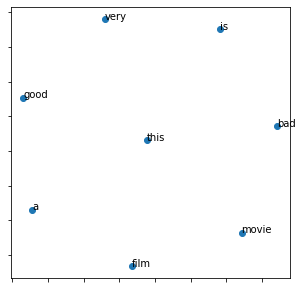

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [0]:
sentences = ['This movie is SOOOO funny!!!',
 'What a movie! I never',
 'best movie ever!!!!! this movie']
type(sentences)
sentences

['This movie is SOOOO funny!!!',
 'What a movie! I never',
 'best movie ever!!!!! this movie']

In [0]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習
print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
  print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[-0.00432061  0.00146342 -0.03311792 -0.03904233  0.03732451 -0.04992527
  0.02734522 -0.03816913  0.0401972  -0.0345713 ]
movieのベクトル : 
[-0.01798015 -0.0188274  -0.00479448  0.01656251  0.01614994 -0.01908701
 -0.01009056 -0.0461502   0.00622939 -0.01964515]
isのベクトル : 
[ 0.00593525 -0.02370409 -0.04295177 -0.04700369 -0.00799415 -0.03957272
 -0.0203962  -0.00839078 -0.04218608 -0.03880072]
veryのベクトル : 
[ 0.02554665 -0.02248098  0.03125134  0.0328373   0.00213881 -0.04529309
  0.04849834  0.03995639  0.0005041   0.00099339]
goodのベクトル : 
[-0.03640822  0.04240274 -0.02286788  0.03799818  0.0141962  -0.01471254
  0.00068117  0.00923571 -0.00676886 -0.0321453 ]
filmのベクトル : 
[-0.04789886 -0.00703039 -0.00933911  0.00307544 -0.03892777 -0.01032932
 -0.04820976 -0.01435253  0.01311033  0.04308848]
aのベクトル : 
[ 0.01174868  0.01613882 -0.00124863 -0.04566534  0.03849325 -0.01305924
 -0.00215019 -0.0168242

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


## 【問題5】コーパスの前処理
コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。また、単語（トークン）はリストで分割してください。



In [0]:
import re

def sentence_to_words(contents):
  words_list = []
  for content in contents:
    words_list.append(content.split())
  return words_list

# def corpus_preprocessing(contents):
#   pattern = '[\a-zA-Z0-9_]'
#   p = re.compile(pattern)
#   words_list = sentence_to_words(contents)
#   for words in range(len(words_list)):
#     for word in range(len(words_list))

#   return result

def corpus_preprocessing(contents):
  html_tag = r'<br /><br />' 
  pattern = r'[^a-zA-Z0-9 ]'

  html = re.compile(html_tag)
  p = re.compile(pattern)

  result = [html.sub(' ', contents[s]) for s in range(len(contents))]
  result = [p.sub('', result[s]) for s in range(len(result))]
  result = [result[s].lower() for s in range(len(result))]

  result = sentence_to_words(result)

  return result

In [0]:
len(x_train)

25000

In [0]:
sample = corpus_preprocessing(x_train[:1000])
sample[0]

['zero',
 'day',
 'leads',
 'you',
 'to',
 'think',
 'even',
 'rethink',
 'why',
 'two',
 'boysyoung',
 'men',
 'would',
 'do',
 'what',
 'they',
 'did',
 'commit',
 'mutual',
 'suicide',
 'via',
 'slaughtering',
 'their',
 'classmates',
 'it',
 'captures',
 'what',
 'must',
 'be',
 'beyond',
 'a',
 'bizarre',
 'mode',
 'of',
 'being',
 'for',
 'two',
 'humans',
 'who',
 'have',
 'decided',
 'to',
 'withdraw',
 'from',
 'common',
 'civility',
 'in',
 'order',
 'to',
 'define',
 'their',
 'ownmutual',
 'world',
 'via',
 'coupled',
 'destruction',
 'it',
 'is',
 'not',
 'a',
 'perfect',
 'movie',
 'but',
 'given',
 'what',
 'moneytime',
 'the',
 'filmmaker',
 'and',
 'actors',
 'had',
 'it',
 'is',
 'a',
 'remarkable',
 'product',
 'in',
 'terms',
 'of',
 'explaining',
 'the',
 'motives',
 'and',
 'actions',
 'of',
 'the',
 'two',
 'young',
 'suicidemurderers',
 'it',
 'is',
 'better',
 'than',
 'elephant',
 'in',
 'terms',
 'of',
 'being',
 'a',
 'film',
 'that',
 'gets',
 'under',
 'ou

## 【問題6】Word2Vecの学習
Word2Vecの学習を行なってください。

In [0]:
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
print(sample)
model.build_vocab(sample) # 準備
model.train(sample, total_examples=model.corpus_count, epochs=model.iter) # 学習
print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
  print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

Output hidden; open in https://colab.research.google.com to view.